## scAnalysis of sorted-macrophages from Axolotl limb and blastema

Here we start with the raw matrix produced by featureCount. Raw counts are filtered, transformed, and dimensionality rediction is performed.

In [1]:

library(Seurat)
library(sctransform)
library(dplyr)
library(tidyverse)
library(readxl)
library(stringr)

Warning message:
"package 'Seurat' was built under R version 4.0.4"
Attaching SeuratObject

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tidyr' was built under R version 4.0.4"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'readxl

In [2]:
## Get and clean the data
MacData <- read.table(file = "../../Data/Macrophages/bfx1461.AmexG_v6_DD.eAmexG_v6_DD.txt", 
                     skip = 1, header = T, 
                     row.names = 1, sep = "\t", stringsAsFactors = F)
MacData <- MacData[,-c(1:5)]

In [3]:
AxoMac <- CreateSeuratObject(counts = MacData)
AxoMac

An object of class Seurat 
99218 features across 768 samples within 1 assay 
Active assay: RNA (99218 features, 0 variable features)

In [4]:
#Initial number of cells
table(AxoMac@meta.data$orig.ident)


Blastema     Bulk     Limb       NC      UHR 
     381        2      381        2        2 

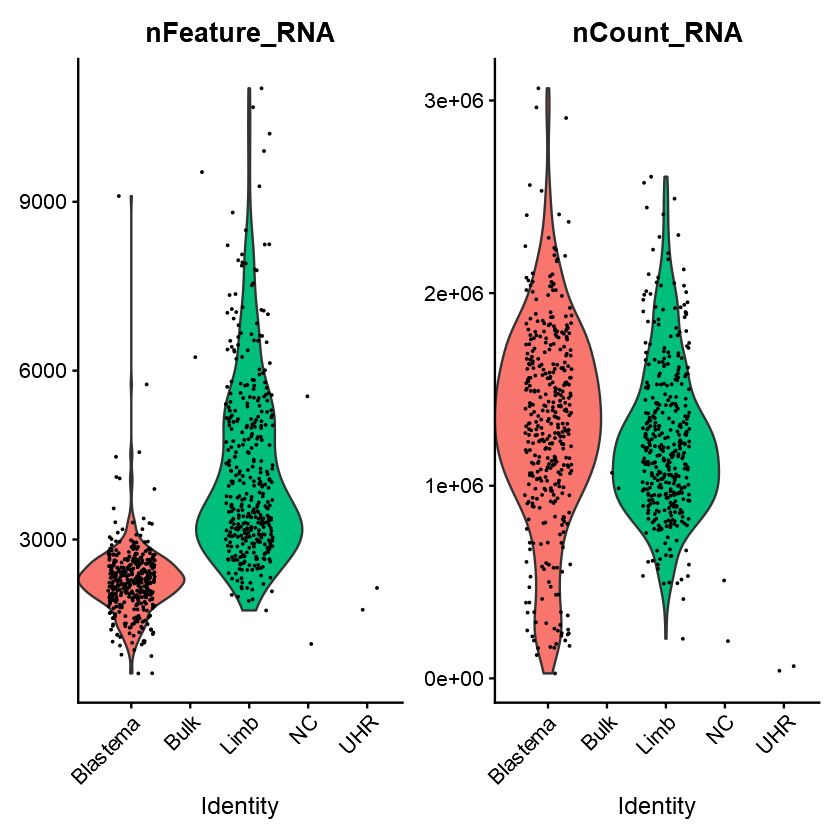

In [5]:
VlnPlot(AxoMac, features = c("nFeature_RNA", "nCount_RNA"))

In [6]:
AxoMac <- subset(AxoMac, 
                 subset = nFeature_RNA > 500)

In [7]:
AxoMac <- subset(AxoMac, 
                 subset = nFeature_RNA < 9000)

In [8]:
## Cutoff for nCount_RNA
AxoMac <- subset(AxoMac, 
                 subset = nCount_RNA > 20000)

In [9]:
AxoMac <- subset(AxoMac, idents = c("Blastema", "Limb"))
AxoMac@meta.data$orig.ident <- factor(AxoMac@meta.data$orig.ident)

In [10]:
#Final number of cells
table(AxoMac@meta.data$orig.ident)


Blastema     Limb 
     380      376 

In [11]:
AxoMac <- SCTransform(AxoMac, vars.to.regress = "nCount_RNA", verbose = TRUE)
AxoMac <- RunPCA(AxoMac, verbose = FALSE)
AxoMac <- RunUMAP(AxoMac, dims = 1:30, verbose = FALSE)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 21961 by 756

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 756 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached

  |======================================================================| 100%


There are 4 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 21 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 21961 genes



  |======================================================================| 100%


Computing corrected count matrix for 21961 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 24.03526 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out nCount_RNA

Centering data matrix

Set default assay to SCT

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


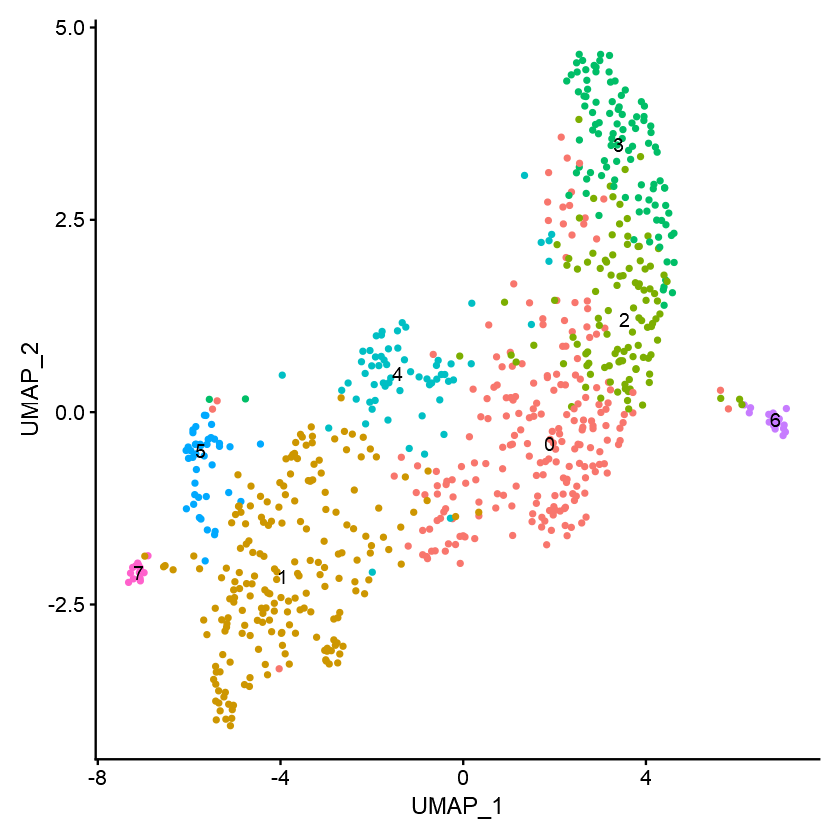

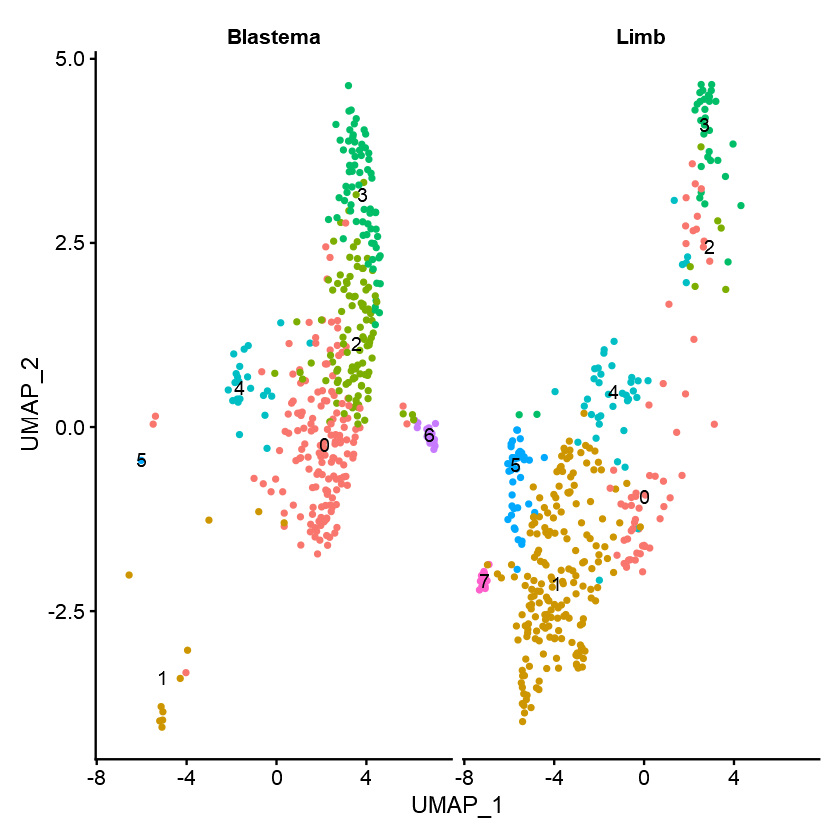

In [12]:
AxoMac <- FindNeighbors(AxoMac, dims = 1:30, verbose = FALSE)
AxoMac <- FindClusters(AxoMac, verbose = FALSE, resolution = 1)
DimPlot(AxoMac, label = TRUE) + NoLegend()
DimPlot(AxoMac, label = TRUE, split.by = "orig.ident") + NoLegend()
# AxoMac.markers <- FindAllMarkers(AxoMac, only.pos = TRUE,
#                                min.pct = 0.25,
#                                logfc.threshold = 0.25)

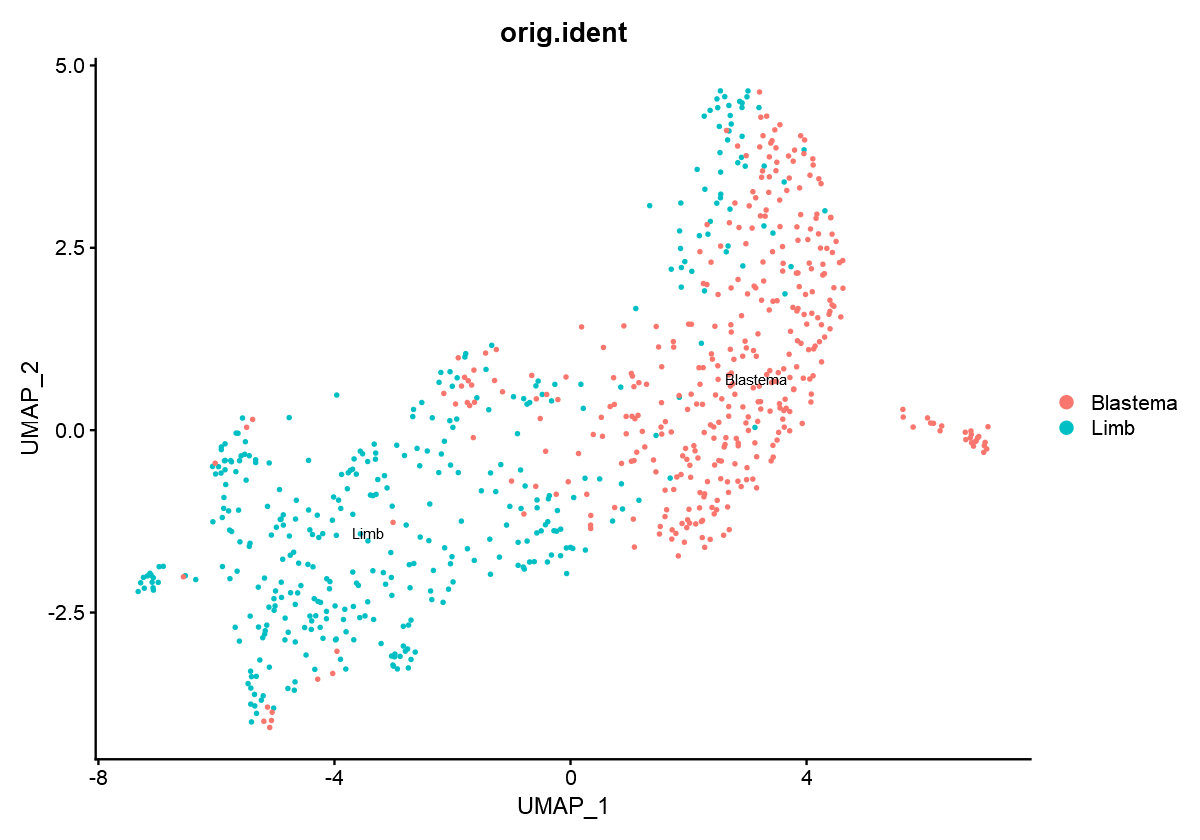

In [13]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(AxoMac, reduction = "umap", pt.size = 0.5, label = T, 
        label.size = 3, group.by = "orig.ident", repel = T)# + NoLegend()

In [14]:
# saveRDS(AxoMac, file = "Macrophage_Seurat.rds")

**Subset to Blastema only**

In [16]:
AxoMac <- subset(x = AxoMac, subset = orig.ident == "Blastema")
AxoMac

An object of class Seurat 
121179 features across 380 samples within 2 assays 
Active assay: SCT (21961 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [17]:
AxoMac <- RunPCA(AxoMac, features = VariableFeatures(object = AxoMac))
dims.use = 1:30
AxoMac <- RunUMAP(AxoMac, dims = dims.use)
AxoMac <- FindNeighbors(AxoMac, dims = dims.use)
AxoMac <- FindClusters(AxoMac, resolution = 1)

PC_ 1 
Positive:  AMEX60DD026264, AMEX60DD021531, AMEX60DD026267, AMEX60DD021527, AMEX60DD016339, AMEX60DD002923, AMEX60DD043772, AMEX60DD009712, AMEX60DD031927, AMEX60DD004586 
	   AMEX60DD018273, AMEX60DD028125, AMEX60DD037910, AMEX60DD051994, AMEX60DD041096, AMEX60DD025537, AMEX60DD053862, AMEX60DD018004, AMEX60DD022398, AMEX60DD012818 
	   AMEX60DD030131, AMEX60DD027994, AMEX60DD043997, AMEX60DDU001020666, AMEX60DD007589, AMEX60DD044130, AMEX60DD055165, AMEX60DD030096, AMEX60DD045450, AMEX60DD009937 
Negative:  ERCC-00074, AMEX60DDU001033882, AMEX60DDU001015947, AMEX60DDU001010113, ERCC-00004, AMEX60DD029125, ERCC-00130, AY659991.45, AMEX60DD038964, ERCC-00046 
	   AMEX60DD046910, AMEX60DD044221, AMEX60DD014744, AY659991.8, AMEX60DD038570, AMEX60DD027684, AMEX60DD043905, ERCC-00171, AMEX60DD026202, AMEX60DD029314 
	   AMEX60DD033377, AMEX60DD009191, AMEX60DD029362, AMEX60DD047411, AMEX60DD049490, AMEX60DD037922, AMEX60DD038686, AMEX60DD052291, AMEX60DD054029, AMEX60DD019042 
PC_ 2 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 380
Number of edges: 20973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5158
Number of communities: 4
Elapsed time: 0 seconds


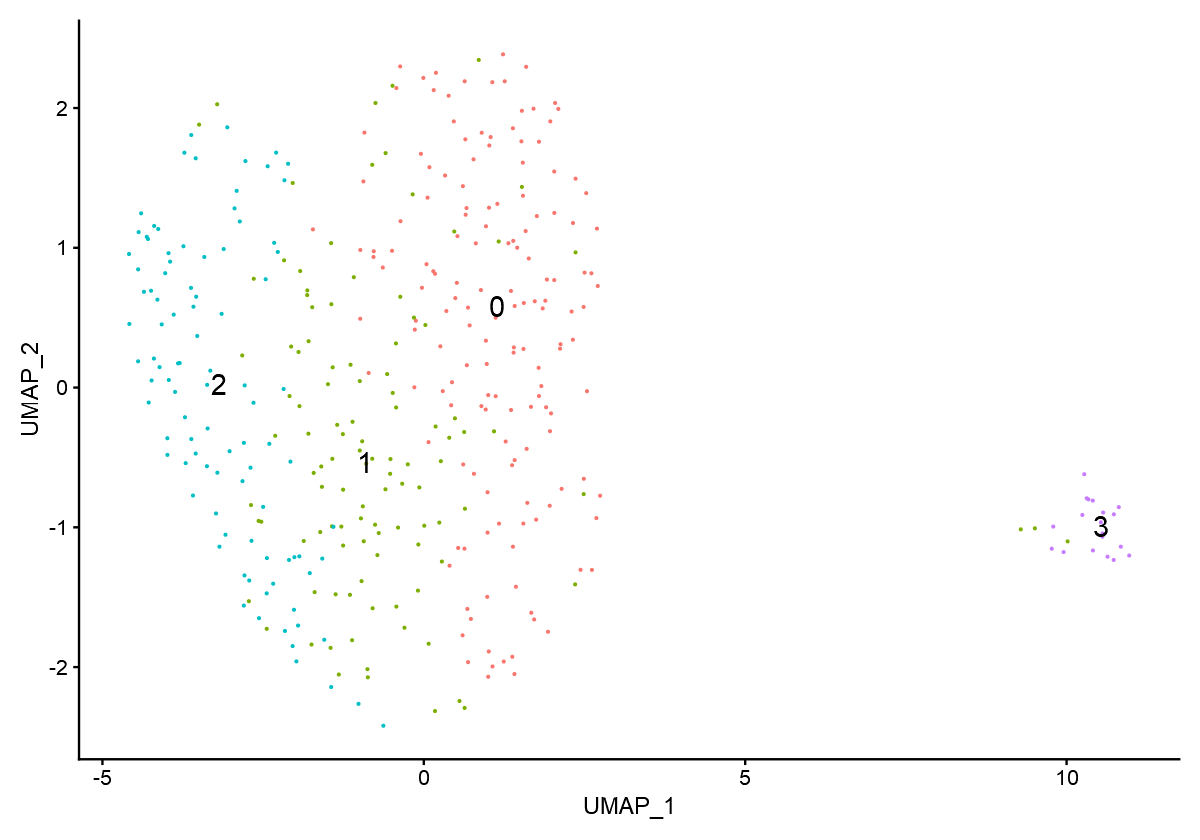

In [18]:
DimPlot(AxoMac, reduction = "umap", pt.size = 0.1, label = T, label.size = 6) + NoLegend()


In [19]:
saveRDS(AxoMac, file = "Macrophage_Blastema_Seurat.rds")

In [20]:
# Set reticulate to use your preferred python version
reticulate::use_python("C:/Users/giovanni/anaconda3/envs/python39/python.exe")
reticulate::py_config()

python:         C:/Users/giovanni/anaconda3/envs/python39/python.exe
libpython:      C:/Users/giovanni/anaconda3/envs/python39/python39.dll
pythonhome:     C:/Users/giovanni/anaconda3/envs/python39
version:        3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/giovanni/anaconda3/envs/python39/Lib/site-packages/numpy
numpy_version:  1.20.3

python versions found: 
 C:/Users/giovanni/anaconda3/envs/python39/python.exe
 C:/Users/giovanni/anaconda3/python.exe
 C:/Users/giovanni/anaconda3/envs/4-rstudio/python.exe
 C:/Users/giovanni/anaconda3/envs/R-env/python.exe
 C:/Users/giovanni/anaconda3/envs/r4-base/python.exe
 C:/Users/giovanni/anaconda3/envs/spyder/python.exe

In [21]:
sceasy::convertFormat(AxoMac, from="seurat", to="anndata",
                       outFile='Macrophage_Blastema_Seurat.h5ad')

Warning message in .regularise_df(obj@meta.data, drop_single_values = drop_single_values):
"Dropping single category variables:orig.ident"


AnnData object with n_obs × n_vars = 380 × 99218
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'